<a href="https://colab.research.google.com/github/keter254/ADS-CodeWars/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas 
data =pandas.read_csv("https://modcom.co.ke/data/datasets/Advertising.csv")
data.head(2)

,No,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4


In [37]:
# Y must be continous to do regression yes
#No text data.ML data does not support data .If categorical variable exist in the independent variable encode to 0s and 1s
#No empties

In [38]:
# Step 1:Split to X-Independent and Y-dependent variable
array=data.values

X=array[:,1:4] # 4 is not counted
Y=array[:,4]
# X & Y in capital


In [39]:
# Step 2:split to training set and testint set
#We have 200 records,70% is uesd training the model,30% used in testing model(hideout)
from sklearn import model_selection
X_train,X_test,Y_train,Y_test=model_selection.train_test_split(X,Y,test_size=0.3,random_state=42)
#X_train consist of TV,Radio,Newspaper-70%
#Y_train consist of sales -70%

#X_test consist of TV,Radio,Newspaper 30%
#Y_test consist of Sales 30%

In [40]:
#Step 2 A:Cross Validation of Algorithm/Models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

models = []
models.append(('KNN', KNeighborsRegressor()))
models.append(('DT', DecisionTreeRegressor()))
models.append(('LR', LinearRegression()))
models.append(('GB', GradientBoostingRegressor()))
models.append(('RFR', RandomForestRegressor()))
models.append(('RFR', RandomForestRegressor()))
models.append(('SVM', SVR()))

#kfold validation
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring = 'r2')
    print(name, cv_results.mean())

KNN 0.8790725161630053
DT 0.9123837344361467
LR 0.8757671101319765
GB 0.9669135517380256
RFR 0.9668387205428424
RFR 0.9640892617366676
SVM 0.7366226480205218


In [41]:
# Step 3:Load Machine Learning Models/Algorithms
from sklearn.linear_model import LinearRegression
model=GradientBoostingRegressor()
model.fit(X_train,Y_train)
print('Training happens at this point..')

Training happens at this point..


In [42]:
# Step 4:Test the Model
predictions = model.predict(X_test)
print('Model predictions',predictions)
print('Actual Values',Y_test)

Model predictions [17.11177509 21.89584916 20.31149838  6.18264522 23.52855497 12.969581
 22.7833106   9.34468943 11.76430183 15.90246377  8.35901421  8.83027211
 12.50902579  2.87859106 10.42048147 12.11370977  4.66835775 16.57238947
 11.31385106 19.16646081 20.32496807 13.27493867 10.6955329  22.6768956
  9.95845348  8.56160215 22.82893407 12.50256299 10.11953957  4.43821117
 11.40986866 11.31385106 22.26426487  8.8430053  15.59768903 20.65114169
 12.41021231 20.19353127 12.44261317  7.27286007 10.79548005 12.64358481
 10.11585805  9.43597287 11.75264503  8.10889839 10.46473459 14.19871042
 10.25025792 12.43543084 14.60987851 12.06376764  6.36404816  4.61386074
  8.85128696 10.88775312 10.22398563 25.32367776  7.03554193 11.78598809]
Actual Values [16.9 22.4 21.4  7.3 24.7 12.6 22.3  8.4 11.5 14.9  9.5  8.7 11.9  5.3
 10.3 11.7  5.5 16.6 11.3 18.9 19.7 12.5 10.9 22.2  9.3  8.1 21.7 13.4
 10.6  5.7 10.6 11.3 23.7  8.7 16.1 20.7 11.6 20.8 11.9  6.9 11.  12.8
 10.1  9.7 11.6  7.6 10.5 1

In [43]:
# Step : Get metrics using r squared
from sklearn.metrics import r2_score
print('Score',r2_score(Y_test,predictions))

Score 0.9805431705273888


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


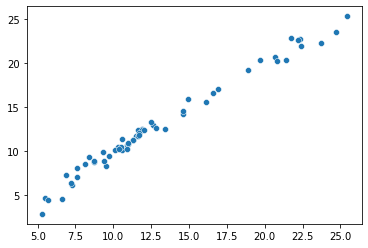

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(Y_test,predictions)

In [45]:
# Step 6: Use the model to predict the future
expense=[[240,50,70]]
outcome =model.predict(expense)
print('You are likely to sell',outcome,'Units of Perfume')
data.corr()

You are likely to sell [24.43425014] Units of Perfume


,No,TV,Radio,Newspaper,Sales
No,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
Radio,-0.110680,0.054809,1.000000,0.354104,0.576223
Newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
Sales,-0.051616,0.782224,0.576223,0.228299,1.000000


In [46]:
# Y = MX + C